## Writing Efficient Queries
Write queries to run faster and use less data.

### Some useful functions
We will use two functions to compare the efficiency of different queries:

- `show_amount_of_data_scanned()` shows the amount of data the query uses.
- `show_time_to_run()` prints how long it takes for the query to execute.


## Strategies
1. Only select the columns you want
    
    Using `SELECT * FROM ..` it's convinient, but it's very inefficient. Just select the feature you want.
    ```python
    star_query = "SELECT * FROM `bigquery-public-data.github_repos.contents`"
    show_amount_of_data_scanned(star_query)

    basic_query = "SELECT size, binary FROM `bigquery-public-data.github_repos.contents`"
    show_amount_of_data_scanned(basic_query)
    ```

2. Read less data

    Both queries below calculate the average duration (in seconds) of one-way bike trips in the city of San Francisco.
    ```python
    more_data_query = """
                  SELECT MIN(start_station_name) AS start_station_name,
                      MIN(end_station_name) AS end_station_name,
                      AVG(duration_sec) AS avg_duration_sec
                  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
                  WHERE start_station_id != end_station_id 
                  GROUP BY start_station_id, end_station_id
                  LIMIT 10
                  """
    show_amount_of_data_scanned(more_data_query)

    less_data_query = """
                    SELECT start_station_name,
                        end_station_name,
                        AVG(duration_sec) AS avg_duration_sec                  
                    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
                    WHERE start_station_name != end_station_name
                    GROUP BY start_station_name, end_station_name
                    LIMIT 10
                    """
    show_amount_of_data_scanned(less_data_query)
    ```

3. Avoid N:N JOINs
Most of the JOINs that you have executed in this course have been 1:1 JOINs. In this case, each row in each table has at most one match in the other table.

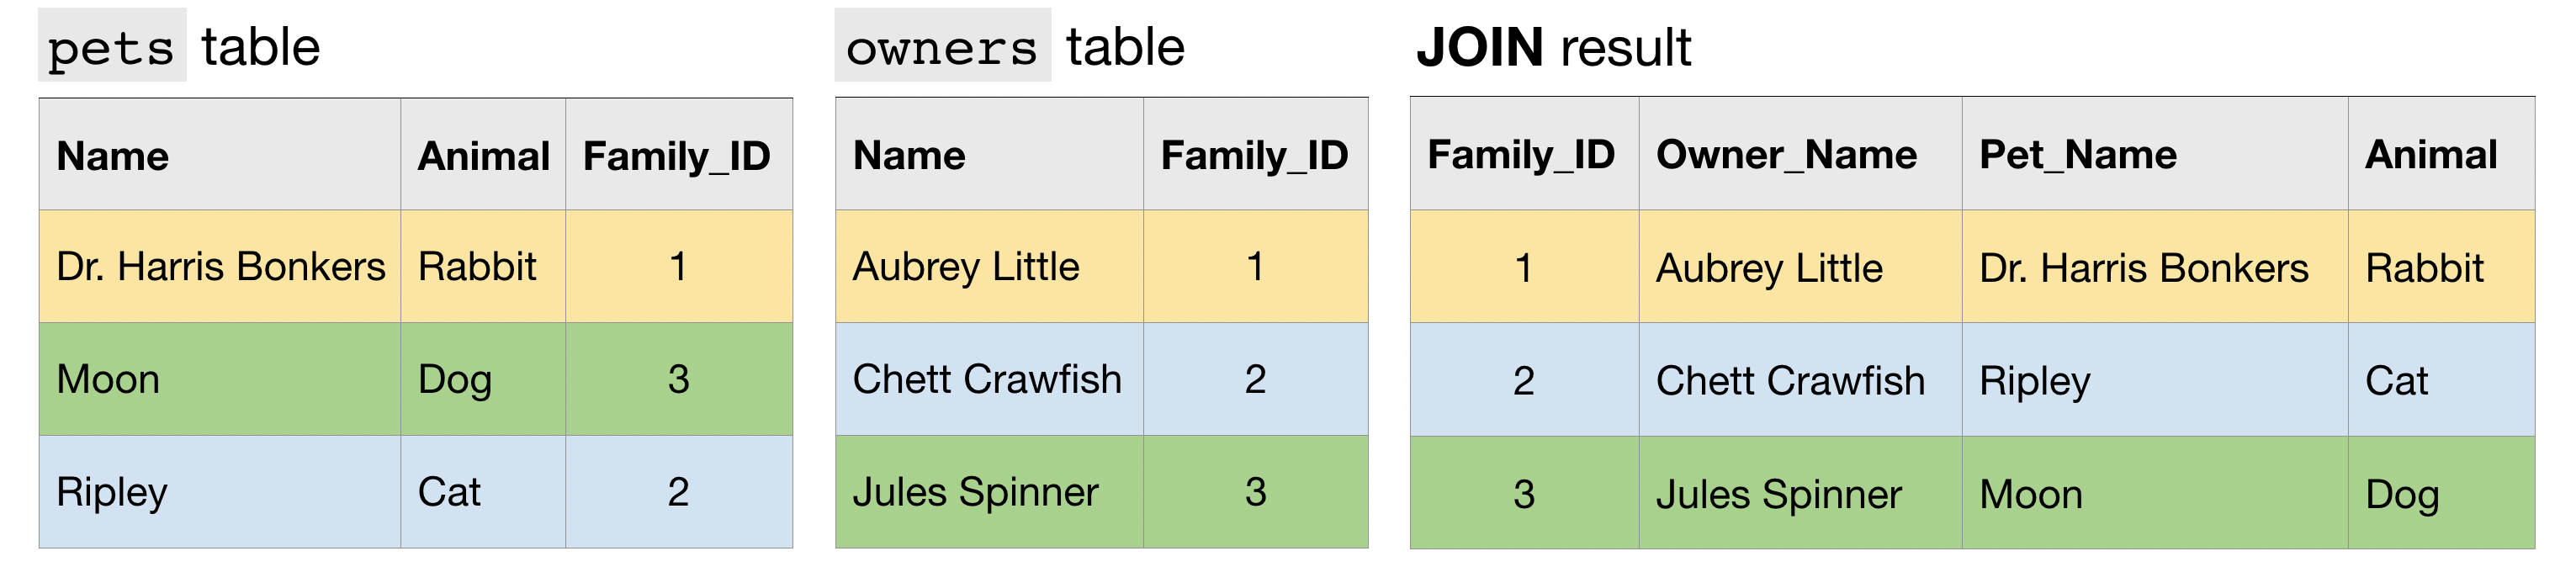


